<a href="https://colab.research.google.com/github/surajsarkar/deepLearning/blob/main/notebooks/03_CNN_Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION TO CONVOLUTIONAL NURAL NETWORK WITH TENSORFLOW**



## **Get Data**

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-06-08 04:14:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 142.250.188.48, 172.217.15.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   290MB/s    in 0.4s    

2022-06-08 04:14:20 (290 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data 

A very crusial step at the beggning of any machine learning project is becoming one with the data.

And for a computer vision problem, this usually means visualising many samples of data.


In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os 

# Walk through pizza_steak directory and list the number of files
for dirpath, dirnames, filename in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filename)} files in '{dirpath}'")

There are 2 directories and 0 files in 'pizza_steak'
There are 2 directories and 0 files in 'pizza_steak/test'
There are 0 directories and 250 files in 'pizza_steak/test/pizza'
There are 0 directories and 250 files in 'pizza_steak/test/steak'
There are 2 directories and 0 files in 'pizza_steak/train'
There are 0 directories and 750 files in 'pizza_steak/train/pizza'
There are 0 directories and 750 files in 'pizza_steak/train/steak'


In [ ]:
# Another way to find out how many file inside a folder.

num_pizza_train_images = len(os.listdir("pizza_steak/train/pizza"))

num_pizza_train_images

750

In [ ]:
# Get the class name programatically 
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")

class_name = np.array(sorted([item.name for item in data_dir.glob("*")])) # will create class name from the name of the sub directories

print(class_name)

['pizza' 'steak']


In [ ]:
import random
img_dir = pathlib.Path("pizza_steak/train/pizza")
img_name_list = [item.name for item in img_dir.glob("*")]

len(img_name_list), img_name_list[1]

(750, '857888.jpg')

In [ ]:
t_img = os.listdir("pizza_steak/train/pizza")[1]
t_img

'857888.jpg'

In [ ]:
# Let's view our images 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(filepath, targetclass):
  """
  Setup the target directory(We'll see images from here.)
  """
  target_folder = filepath + targetclass
  # Get a random image
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image[0])
  # Read the image and plot it with the help of matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)
  plt.axis(False)
  plt.title(targetclass)

  print(f"Image Shape: {img.shape}") # show the shape of the image

  return img


2877565.jpg
Image Shape: (341, 512, 3)


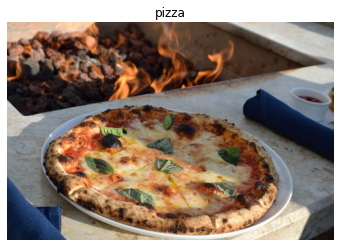

In [ ]:
# view a random image from traning dataset

img = view_random_image(filepath = "pizza_steak/train/", targetclass = "pizza")

In [ ]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(341, 512, 3), dtype=uint8, numpy=
array([[[211, 181, 157],
        [197, 167, 143],
        [193, 163, 139],
        ...,
        [ 76,  68,  57],
        [ 70,  62,  51],
        [ 63,  55,  44]],

       [[211, 183, 159],
        [199, 171, 147],
        [200, 170, 146],
        ...,
        [ 74,  66,  55],
        [ 69,  61,  50],
        [ 64,  56,  45]],

       [[218, 190, 166],
        [207, 179, 155],
        [206, 178, 154],
        ...,
        [ 71,  63,  52],
        [ 68,  60,  49],
        [ 65,  57,  46]],

       ...,

       [[ 13,  21,  40],
        [ 14,  22,  41],
        [ 12,  23,  41],
        ...,
        [ 21,  12,  15],
        [ 22,  13,  16],
        [ 23,  14,  17]],

       [[ 13,  21,  40],
        [ 14,  22,  41],
        [ 12,  23,  41],
        ...,
        [ 21,  12,  15],
        [ 22,  13,  16],
        [ 23,  14,  17]],

       [[ 14,  22,  41],
        [ 14,  22,  41],
        [ 13,  24,  42],
        ...,
        [ 21,  12,  1

In [ ]:
img[0, 0:2, :]

array([[211, 181, 157],
       [197, 167, 143]], dtype=uint8)

In [ ]:
# Get all the pixel values normalized (between 0 and 1)

norm_img = tf.constant(img)/255 

In [ ]:
norm_img

<tf.Tensor: shape=(341, 512, 3), dtype=float32, numpy=
array([[[0.827451  , 0.70980394, 0.6156863 ],
        [0.77254903, 0.654902  , 0.56078434],
        [0.75686276, 0.6392157 , 0.54509807],
        ...,
        [0.29803923, 0.26666668, 0.22352941],
        [0.27450982, 0.24313726, 0.2       ],
        [0.24705882, 0.21568628, 0.17254902]],

       [[0.827451  , 0.7176471 , 0.62352943],
        [0.78039217, 0.67058825, 0.5764706 ],
        [0.78431374, 0.6666667 , 0.57254905],
        ...,
        [0.2901961 , 0.25882354, 0.21568628],
        [0.27058825, 0.23921569, 0.19607843],
        [0.2509804 , 0.21960784, 0.1764706 ]],

       [[0.85490197, 0.74509805, 0.6509804 ],
        [0.8117647 , 0.7019608 , 0.60784316],
        [0.80784315, 0.69803923, 0.6039216 ],
        ...,
        [0.2784314 , 0.24705882, 0.20392157],
        [0.26666668, 0.23529412, 0.19215687],
        [0.25490198, 0.22352941, 0.18039216]],

       ...,

       [[0.05098039, 0.08235294, 0.15686275],
        [0.05

## **An end to end example**

Let's build a convolutional nural network to find patterns in our images more specifically 

* Load our images
* Preprocess our image 
* Build a CNN to find patterns in our image
* Compile the CNN
* Fit the CNN to our traning data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

# Preprocess data (get all the pixel value between 0 & 1 also known as scaling/normalization)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up the path of our data directory 
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn them it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size = (224, 224),
                                               class_mode="binary",
                                               seed=42,)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                            batch_size=32,
                                            target_size = (224, 224),
                                            class_mode = "binary",
                                            seed=42)

# Build a CNN model (same as tiny vgg on the cnn explainer website)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         ),
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile our CNN model
model_1.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)


# Fit the model

history_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data), 
    validation_data=valid_data, 
    validation_steps=len(valid_data),
    )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 209ms/step - loss: 0.5467 - accuracy: 0.7153 - val_loss: 0.3686 - val_accuracy: 0.8420
Epoch 2/5
47/47 [==============================] - 9s 199ms/step - loss: 0.4115 - accuracy: 0.8127 - val_loss: 0.3784 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3827 - accuracy: 0.8287 - val_loss: 0.3122 - val_accuracy: 0.8820
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3601 - accuracy: 0.8420 - val_loss: 0.2878 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3146 - accuracy: 0.8700 - val_loss: 0.2822 - val_accuracy: 0.8860


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
# set seed 
tf.random.set_seed(42)

# Create a model 
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_2.compile(
    loss='binary_crossentropy',
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
)


# Fit a model 
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 9s 187ms/step - loss: 0.7185 - accuracy: 0.4953 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
47/47 [==============================] - 8s 180ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
47/47 [==============================] - 8s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
47/47 [==============================] - 8s 181ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 

In [ ]:
model_2.evaluate(valid_data)

16/16 [==============================] - 2s 131ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931471824645996, 0.5]

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 10)                1505290   
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 6)                 66        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1,505,583
Trainable params: 1,505,583
No

# **Binary Classification: Let's break it down**

1. Become one with the data (visualise, visualise, visulaise)
2. Preprocess the data(Prepared it for our model, the main step here was standardise/normalise data) 
3. Create a model 
4. Compile a model.
5. Fit the model
6. Evaluate the model
7. Adjust the different parameter and improve the model(try to beat our baseline)
8. Repeat until satisfied. (experiment, experiment, experiment)

## **1. Become one with the data**

3798959.jpg
Image Shape: (512, 512, 3)
3707493.jpg
Image Shape: (512, 512, 3)


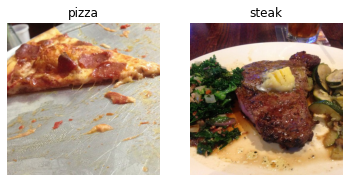

In [ ]:
#Visualizing data 
import os
plt.figure()
plt.subplot(1, 2, 1)
pizza_image = view_random_image("pizza_steak/train/", "pizza")
plt.subplot(1, 2, 2)
steak_image = view_random_image("pizza_steak/train/", "steak")
# plt.imshow()

## **2. Preprocess our data**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load the image from directory and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, #The directory of training data
                                  target_size=(224, 224), # How to reshape the image
                                  class_mode="binary", # type of classificatoin binary or multiclass
                                  batch_size=32, #Number of image per batch.
                                  )

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                 target_size=(224, 224),
                                 class_mode="binary",
                                 batch_size=32,)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch.
images, labels = train_data.next() # get the "next" bachtch of images/labels in train data
len(images), len(labels)

(32, 32)

In [ ]:
# Get how many batches are there 
len(train_data)

47

In [ ]:
images[0], images.shape

(array([[[0.0509804 , 0.04705883, 0.03921569],
         [0.07843138, 0.07450981, 0.06666667],
         [0.05882353, 0.0509804 , 0.05490196],
         ...,
         [0.03529412, 0.03529412, 0.02745098],
         [0.03921569, 0.04313726, 0.02352941],
         [0.03137255, 0.03529412, 0.01568628]],
 
        [[0.03529412, 0.03137255, 0.02352941],
         [0.04705883, 0.04313726, 0.03529412],
         [0.03921569, 0.03137255, 0.03529412],
         ...,
         [0.03137255, 0.02745098, 0.01176471],
         [0.03137255, 0.02745098, 0.01176471],
         [0.03137255, 0.02745098, 0.01176471]],
 
        [[0.04705883, 0.04313726, 0.03529412],
         [0.02745098, 0.02352941, 0.01568628],
         [0.03137255, 0.02352941, 0.02745098],
         ...,
         [0.03137255, 0.02745098, 0.01176471],
         [0.03529412, 0.03137255, 0.01568628],
         [0.04313726, 0.03921569, 0.02352941]],
 
        ...,
 
        [[0.44705886, 0.454902  , 0.4431373 ],
         [0.5921569 , 0.6       , 0.58039

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
type(images[0])

numpy.ndarray

In [ ]:
labels

array([1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.],
      dtype=float32)

## **3. Create a CNN model** (start with a baseline)

A baseline is relatively a simple model or existing result that you setup when you beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.



In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
# Create a model (this will be our baseline)
model_4 = Sequential([
  Conv2D(filters=10,  kernel_size = 3, padding="valid", strides=1, activation="relu", input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid")
])

## **4. Compile a model**

In [ ]:
# compile a model 

model_4.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"],
)

## **5. Fit a model**

In [ ]:
history_4 = model_4.fit(
    train_data,
    epochs=5, 
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data),
)

Epoch 1/5
47/47 [==============================] - 11s 215ms/step - loss: 1.5436 - accuracy: 0.5840 - val_loss: 0.5184 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4634 - accuracy: 0.7973 - val_loss: 0.3973 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3545 - accuracy: 0.8567 - val_loss: 0.3931 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3056 - accuracy: 0.8807 - val_loss: 0.3379 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 9s 197ms/step - loss: 0.1789 - accuracy: 0.9433 - val_loss: 0.3536 - val_accuracy: 0.8340


In [ ]:
# Take a summery of model_4
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_6 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## **6. Evaluate a model**

In [ ]:
model_4.evaluate(valid_data)

16/16 [==============================] - 2s 137ms/step - loss: 0.3536 - accuracy: 0.8340


[0.35360318422317505, 0.8339999914169312]

### visualise the loss curve

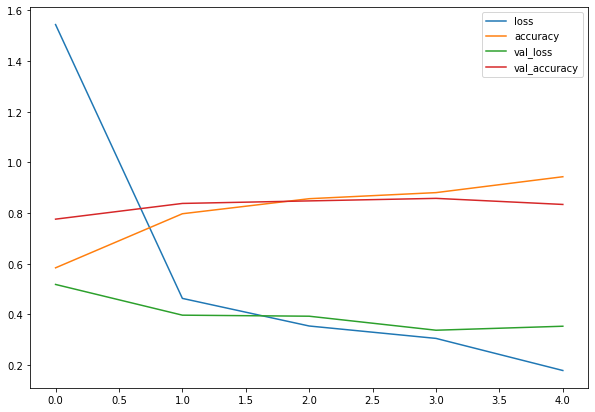

In [ ]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [ ]:
pd.DataFrame(history_4.history)

,loss,accuracy,val_loss,val_accuracy
0,1.543563,0.584000,0.518417,0.776
1,0.463398,0.797333,0.397253,0.838
2,0.354487,0.856667,0.393122,0.848
3,0.305560,0.880667,0.337853,0.858
4,0.178948,0.943333,0.353603,0.834


In [ ]:
len(history_4.history["loss"])

5

In [ ]:
# Split the curvs in four different plots
def plot_history(history):

  history_df = pd.DataFrame(history.history)
  
  loss = history_df["loss"]
  accuracy = history_df["accuracy"]

  val_loss = history_df["val_loss"]
  val_accuracy = history_df["val_accuracy"]

  epochs = range(len(loss))

  plt.figure(figsize=(10, 7))
  plt.plot(epochs, accuracy, label="Traning_accuracy")
  plt.plot(epochs, val_accuracy, label="Validation_accuracy")
  # plt.xlabel("Epochs")
  # plt.ylabel("Loss")
  plt.title("Accuracy")
  plt.legend()

  plt.figure(figsize=(10, 7))
  plt.plot(epochs, loss, label="training_loss")
  plt.plot( epochs, val_loss, label="validation_validation")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title("Loss")

  plt.legend()  

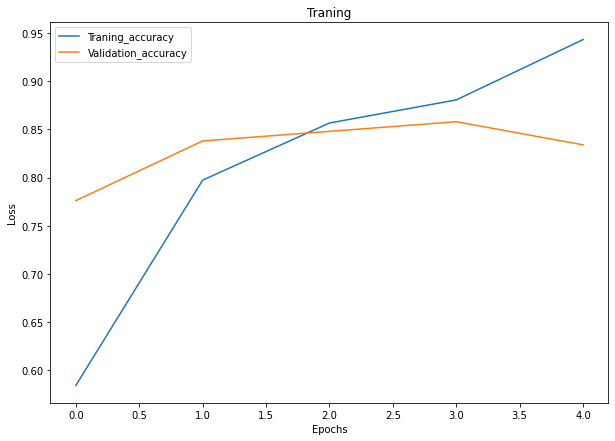

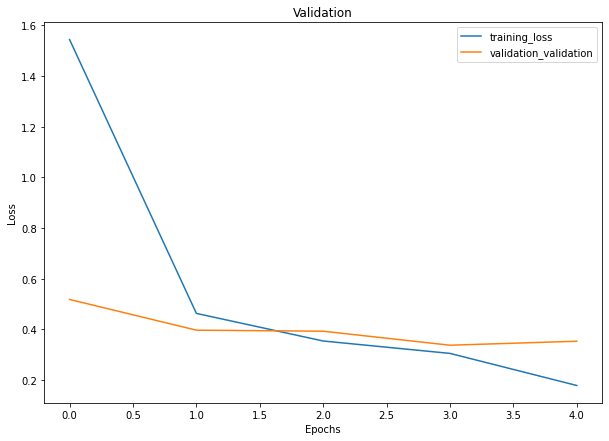

In [ ]:
# Plot the history of model_4 in two different plots

plot_history(history_4)

>🗝️ Note when model's **validation loss starts to increase**, it likely that the model is **overfitting** the traning dataset. This means the model is learning the data in training dataset too *well* thus the model's ability to generalise the unseen data will be diminished.  

### Comparing the loss curve with model_1

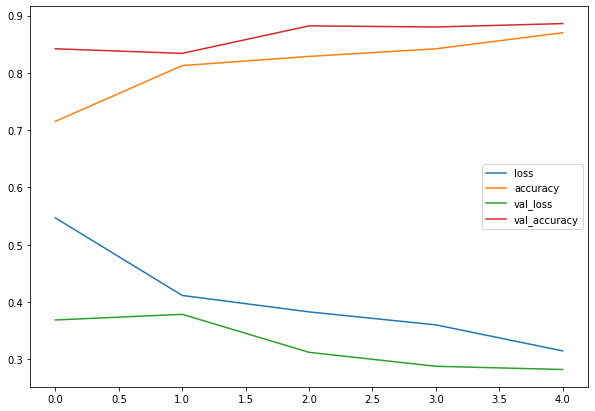

In [ ]:
import pandas as pd

pd.DataFrame(history_1.history).plot(figsize=(10, 7))

## **7. Adjust the model parameter**

Fitting the machine learning model comes in three steps:-
  1. Create a baseline 
  2. Beat the baseline by overfitting the larger model
  3. Reduce overfitting

Ways to induce overfitting:-
  * Increase the number of conv layer
  * Increase the number of filter to our conv layer
  * Add another **Dense** layer to the output of our **Flatten** layer.

Reduce overfitting:-
  * Add data Augmentation.
  * Add regularization layers (such as Maxpool2D)
  * Add more data.. 

  > **NOTE:** Reducing overfitting is also known as **regularization**.

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
# set the random seed 
tf.random.set_seed(42)

# 1. Create a modle 
model_5 = Sequential([
  Conv2D(10, 3, 1, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2, padding="valid"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(2, padding="valid"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(2, padding="valid"),
  Flatten(),
  Dense(1, activation="sigmoid")

])

# 2. Compile a modle
model_5.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)


# 3. Fit a model
history_5 = model_5.fit(
    train_data, 
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 10s 195ms/step - loss: 0.6194 - accuracy: 0.6353 - val_loss: 0.4900 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4847 - accuracy: 0.7740 - val_loss: 0.4040 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4398 - accuracy: 0.7947 - val_loss: 0.3658 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3938 - accuracy: 0.8247 - val_loss: 0.3447 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4021 - accuracy: 0.8273 - val_loss: 0.3855 - val_accuracy: 0.8180


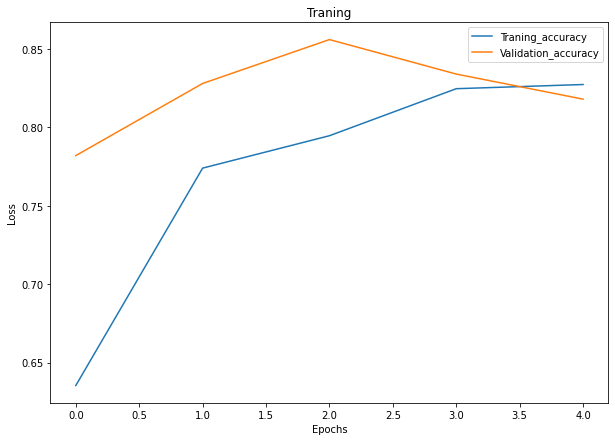

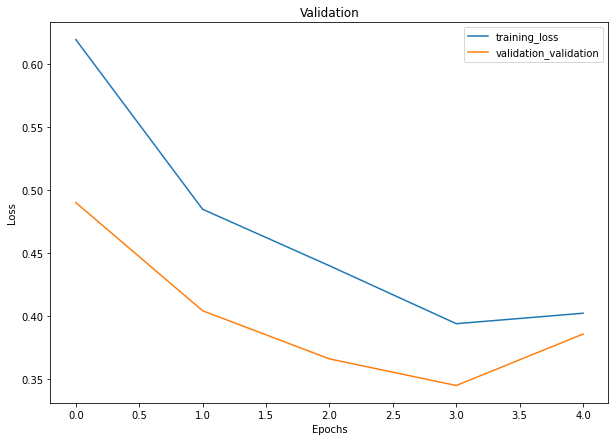

In [ ]:
plot_history(history_5)

In [ ]:
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
model_1.evaluate(valid_data)

16/16 [==============================] - 2s 144ms/step - loss: 0.2822 - accuracy: 0.8860


[0.2821517586708069, 0.8859999775886536]

In [ ]:
model_5.evaluate(valid_data)

16/16 [==============================] - 2s 137ms/step - loss: 0.3855 - accuracy: 0.8180


[0.3855467140674591, 0.8180000185966492]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Create augmented data batches
print("Augmented Data")
augmented_train_datagen = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            height_shift_range=0.2,
                                            width_shift_range=0.2,
                                            shear_range=0.2, 
                                            zoom_range=0.2,
                                            horizontal_flip=True,
                                            )
print("Non-augmented Data")
train_data_gen = ImageDataGenerator(rescale=1/255.)
print("Test data")
test_datagen = ImageDataGenerator(rescale=1/255.)



Augmented Data
Non-augmented Data
Test data


In [ ]:
print("Augmented Data")
train_data_augmented = augmented_train_datagen.flow_from_directory(directory=train_dir,
                                                             target_size=(224, 224),
                                                             batch_size=32,
                                                             class_mode="binary",
                                                             shuffle=False)

print("Non augmented Data")
train_data = train_data_gen.flow_from_directory(directory=train_dir,
                            target_size=(224, 224),
                            batch_size=32,
                            class_mode="binary",
                            shuffle=False,)

print("Test data")
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary",)


Augmented Data
Found 1500 images belonging to 2 classes.
Non augmented Data
Found 1500 images belonging to 2 classes.
Test data
Found 500 images belonging to 2 classes.


In [ ]:
# Get data batch samples

images, labels = train_data.next()

augmented_images, augmented_labels = train_data_augmented.next() # Note labels aren't augmented they stay the same

(-0.5, 223.5, 223.5, -0.5)

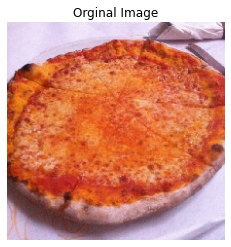

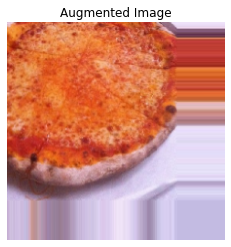

In [ ]:
# Let's visualise the image
# Show augmented image and orginal image
import random
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title("Orginal Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False) 

In [ ]:
# Create a model with augmented data

model_6 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

model_6.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

history_6 = model_6.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 477ms/step - loss: 0.7552 - accuracy: 0.4033 - val_loss: 0.6847 - val_accuracy: 0.6980
Epoch 2/5
47/47 [==============================] - 22s 471ms/step - loss: 0.7119 - accuracy: 0.4760 - val_loss: 0.6846 - val_accuracy: 0.7000
Epoch 3/5
47/47 [==============================] - 22s 473ms/step - loss: 0.6907 - accuracy: 0.5367 - val_loss: 0.6817 - val_accuracy: 0.5280
Epoch 4/5
47/47 [==============================] - 22s 475ms/step - loss: 0.6901 - accuracy: 0.5373 - val_loss: 0.6667 - val_accuracy: 0.6280
Epoch 5/5
47/47 [==============================] - 22s 468ms/step - loss: 0.6628 - accuracy: 0.6393 - val_loss: 0.5892 - val_accuracy: 0.6520


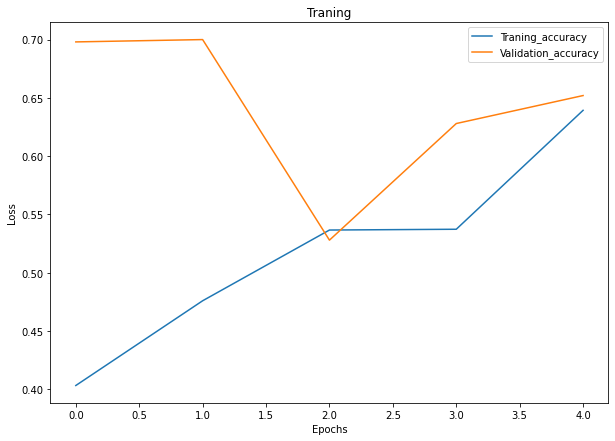

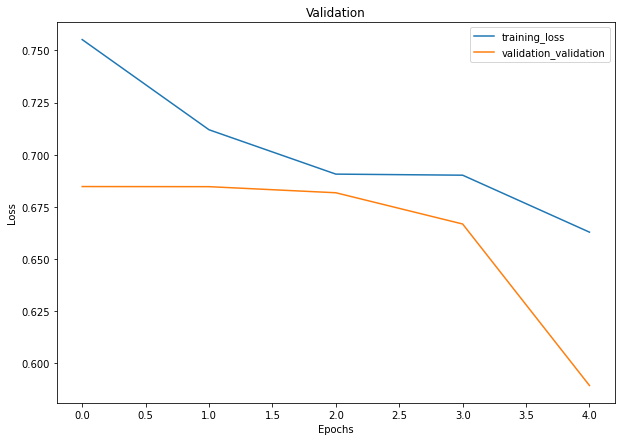

In [ ]:
plot_history(history_6)

In [ ]:
model_6.evaluate(test_data)

16/16 [==============================] - 2s 135ms/step - loss: 0.5892 - accuracy: 0.6520


[0.5891752243041992, 0.6520000100135803]

Create a above model with shuffled data.

In [ ]:
train_data_augmented_shuffled = augmented_train_datagen.flow_from_directory(directory=train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode="binary",
                                                                            shuffle = True)

Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid"),
])

# Compile a model
model_7.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

# Fit a model

history_7 = model_7.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 471ms/step - loss: 0.7324 - accuracy: 0.4753 - val_loss: 0.6864 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 23s 486ms/step - loss: 0.6989 - accuracy: 0.5020 - val_loss: 0.6584 - val_accuracy: 0.5720
Epoch 3/5
47/47 [==============================] - 22s 468ms/step - loss: 0.6768 - accuracy: 0.6067 - val_loss: 0.6596 - val_accuracy: 0.6480
Epoch 4/5
47/47 [==============================] - 22s 468ms/step - loss: 0.6561 - accuracy: 0.6300 - val_loss: 0.5576 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 22s 469ms/step - loss: 0.6372 - accuracy: 0.6640 - val_loss: 0.5884 - val_accuracy: 0.7220


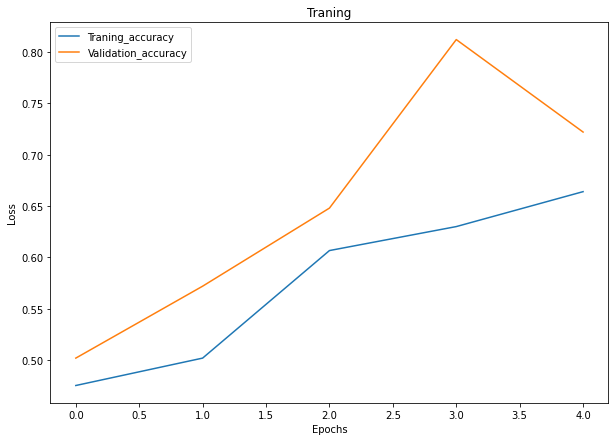

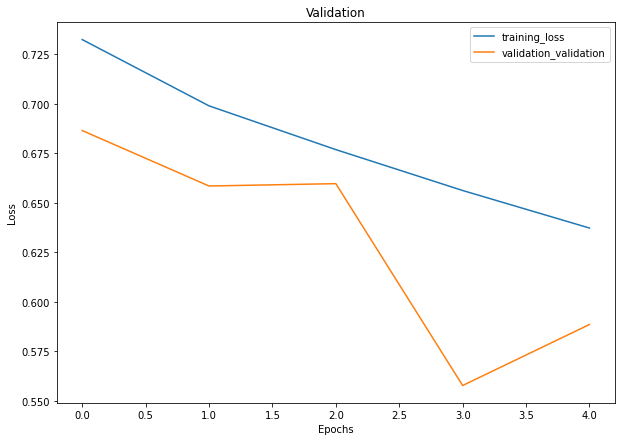

In [ ]:
 plot_history(history_7) 

In [ ]:
model_7.evaluate(test_data)

16/16 [==============================] - 2s 133ms/step - loss: 0.5884 - accuracy: 0.7220


[0.5884485244750977, 0.722000002861023]

## **Making prediction with custom data**

--2022-06-08 04:33:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2022-06-08 04:33:22 (193 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

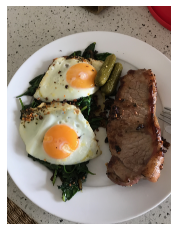

In [ ]:
import matplotlib.image as mpimg

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
# Create a function to load and process image, resize it to able pass it to our model and make prediction
def load_and_prep_image(filename, img_shape=224):
  """**Reads the image form the file and resizes it to desired shape.**"""
  # Read the image
  img = tf.io.read_file(filename)

  # Decode the read file into the tensor
  img = tf.image.decode_image(img)

  # Resize the image 
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all the values between 0 and 1)
  img = img/225.

  return img


In [ ]:
# Load and preprocess our helper image

steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7227778 , 0.705     , 0.6561111 ],
        [0.7372222 , 0.7161111 , 0.66833335],
        [0.7161111 , 0.6894444 , 0.63611114],
        ...,
        [0.5911111 , 0.05777778, 0.10222222],
        [0.5611111 , 0.04777778, 0.08      ],
        [0.5988889 , 0.08777778, 0.11888889]],

       [[0.75      , 0.7322222 , 0.69222224],
        [0.7238889 , 0.70611113, 0.6527778 ],
        [0.74333334, 0.71666664, 0.66333336],
        ...,
        [0.6066667 , 0.07777778, 0.10444444],
        [0.60055554, 0.06722222, 0.10722222],
        [0.5827778 , 0.06277778, 0.09833334]],

       [[0.73888886, 0.7211111 , 0.6677778 ],
        [0.72444445, 0.69555557, 0.6433333 ],
        [0.7438889 , 0.71055555, 0.66055554],
        ...,
        [0.6022222 , 0.07333333, 0.09111111],
        [0.5977778 , 0.07777778, 0.11333334],
        [0.5922222 , 0.05888889, 0.09888889]],

       ...,

       [[0.5588889 , 0.48444444, 0.35166666],
        [0.06

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))

In [ ]:
# Remind ourselves of the class_names
class_name

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
pred_class = class_name[int(tf.round(pred))]
pred_class

'steak'

--2022-06-08 05:08:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-06-08 05:08:53 (200 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



(-0.5, 3023.5, 4031.5, -0.5)

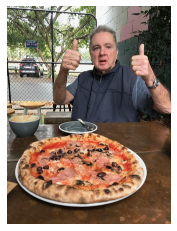

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

pizza = mpimg.imread("03-pizza-dad.jpeg")
plt.imshow(pizza)
plt.axis(False)

In [ ]:
pizza = load_and_prep_image("03-pizza-dad.jpeg")
pizza_pred = model_7.predict(tf.expand_dims(pizza, axis=0))

In [ ]:
p_pred = class_name[int(tf.round(pizza_pred))]
p_pred, pizza_pred

('pizza', array([[0.3897383]], dtype=float32))

# **Working on Multi-Class-Classification**

### **Get the traning and test data for multi-class-classification**

In [ ]:
# Download the data

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2022-06-10 19:38:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 74.125.124.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   135MB/s    in 3.9s    

2022-06-10 19:38:12 (126 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



### **unzip the file and get info about the folder structure**

In [ ]:
import zipfile 

zip_dir = zipfile.ZipFile("/content/10_food_classes_all_data.zip")
zip_dir.extractall()

zip_dir.close()

#### **Inspect the folder**

In [ ]:
import os 

for dirpath, dirname, filename in os.walk("/content/10_food_classes_all_data"):
  print(f"There are {len(dirname)} directory in {len(filename)} files in {dirpath}")

There are 2 directory in 0 files in /content/10_food_classes_all_data
There are 10 directory in 0 files in /content/10_food_classes_all_data/train
There are 0 directory in 750 files in /content/10_food_classes_all_data/train/steak
There are 0 directory in 750 files in /content/10_food_classes_all_data/train/chicken_wings
There are 0 directory in 750 files in /content/10_food_classes_all_data/train/grilled_salmon
There are 0 directory in 750 files in /content/10_food_classes_all_data/train/pizza
There are 0 directory in 750 files in /content/10_food_classes_all_data/train/hamburger
There are 0 directory in 750 files in /content/10_food_classes_all_data/train/fried_rice
There are 0 directory in 750 files in /content/10_food_classes_all_data/train/ramen
There are 0 directory in 750 files in /content/10_food_classes_all_data/train/chicken_curry
There are 0 directory in 750 files in /content/10_food_classes_all_data/train/ice_cream
There are 0 directory in 750 files in /content/10_food_clas

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path("10_food_classes_all_data/train")

classes_name = np.array(sorted([item.name for item in data_dir.glob("*")]))
classes_name 

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
import random 
import pathlib
# random.choice(classes_name)
random_class = pathlib.Path(f"10_food_classes_all_data/train/chicken_curry")
random_image_collection = [item.name for item in random_class.glob("*")]

len(random_image_collection), random_image_collection[0]

(750, '3808493.jpg')

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random 
import os

def view_random_multi_class_image(filepath):
  class_name = random.choice(classes_name)
  target_path = filepath + class_name

  img = random.sample(os.listdir(target_path), 1)
  im_num = mpimg.imread(target_path + "/" + img[0] )

  plt.imshow(im_num)
  print(img[0])
  plt.axis(False)
  plt.title(class_name)

  

2120573.jpg


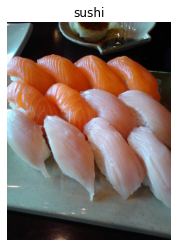

In [ ]:
view_random_multi_class_image("10_food_classes_all_data/train/")

# **Multiclass model**

### **Image Generators**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

### **Make data(image) batches**

In [ ]:
# making image batch from ImageDataGenerator class

# setting up the path variable
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

# Getting data from directory and turning them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size = (224, 224),
                                               )

test_data = test_datagen.flow_from_directory(directory=test_dir, target_size=(224, 224))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### **Copying of `Tiny VGG` Architecture from `CNN Explanier` website.**

In [ ]:
# import essential classes
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPool2D, Conv2D
from tensorflow.keras.optimizers import Adam 


In [ ]:
model_9 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

model_9.compile(
    loss="categorical_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

history_9 = model_9.fit(train_data,
                        epochs=10,
                        steps_per_epoch = len(train_data),
                        validation_data=test_data,
                        validation_steps = len(test_data))

Epoch 1/10
235/235 [==============================] - 61s 203ms/step - loss: 2.2620 - accuracy: 0.1356 - val_loss: 2.1656 - val_accuracy: 0.1900
Epoch 2/10
235/235 [==============================] - 47s 201ms/step - loss: 2.0468 - accuracy: 0.2677 - val_loss: 1.9565 - val_accuracy: 0.3044
Epoch 3/10
235/235 [==============================] - 49s 207ms/step - loss: 1.8162 - accuracy: 0.3680 - val_loss: 1.9444 - val_accuracy: 0.2920
Epoch 4/10
235/235 [==============================] - 48s 203ms/step - loss: 1.5559 - accuracy: 0.4639 - val_loss: 2.0247 - val_accuracy: 0.3008
Epoch 5/10
235/235 [==============================] - 48s 203ms/step - loss: 1.2420 - accuracy: 0.5847 - val_loss: 2.2806 - val_accuracy: 0.2948
Epoch 6/10
235/235 [==============================] - 46s 197ms/step - loss: 0.9458 - accuracy: 0.6825 - val_loss: 2.7519 - val_accuracy: 0.2692
Epoch 7/10
235/235 [==============================] - 47s 198ms/step - loss: 0.6487 - accuracy: 0.7865 - val_loss: 3.4240 - val_ac

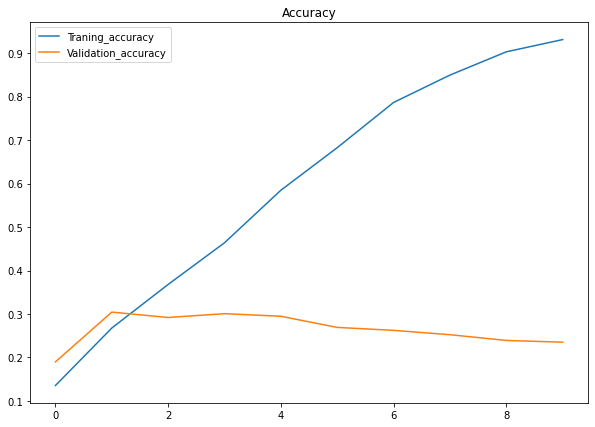

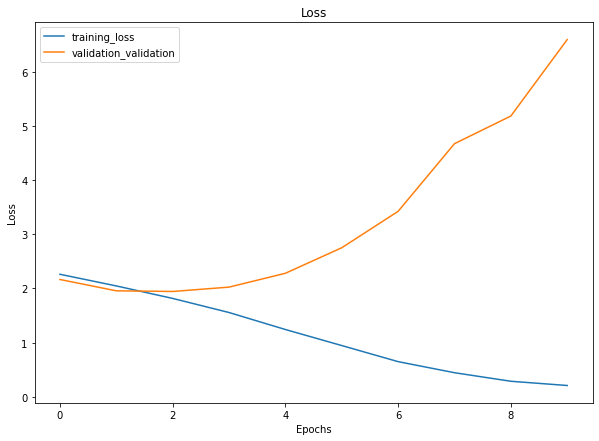

In [ ]:
import pandas as pd
plot_history(history_9)

## **Multilabel classification with augmented data**

1. Augment the traning data.

In [ ]:
augmented_train_datagen = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, 
                                             height_shift_range=0.2,
                                             width_shift_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True,)

In [ ]:
augmented_train_data = augmented_train_datagen.flow_from_directory(directory=train_dir,
                                                                   target_size=(224, 224),)

Found 7500 images belonging to 10 classes.


### **Model_10**

In [ ]:
model_10 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

model_10.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

history_10 = model_10.fit(augmented_train_data,
                          epochs=5,
                          steps_per_epoch=len(augmented_train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 117s 495ms/step - loss: 2.2372 - accuracy: 0.1604 - val_loss: 2.1181 - val_accuracy: 0.2448
Epoch 2/5
235/235 [==============================] - 115s 490ms/step - loss: 2.1272 - accuracy: 0.2256 - val_loss: 2.0171 - val_accuracy: 0.2864
Epoch 3/5
235/235 [==============================] - 114s 486ms/step - loss: 2.0531 - accuracy: 0.2767 - val_loss: 1.9658 - val_accuracy: 0.3152
Epoch 4/5
235/235 [==============================] - 115s 489ms/step - loss: 1.9884 - accuracy: 0.3048 - val_loss: 1.8650 - val_accuracy: 0.3608
Epoch 5/5
235/235 [==============================] - 116s 493ms/step - loss: 1.9488 - accuracy: 0.3192 - val_loss: 1.8230 - val_accuracy: 0.3764


#### **Evaluate the model**

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 13s 169ms/step - loss: 1.8230 - accuracy: 0.3764


[1.823017954826355, 0.3763999938964844]

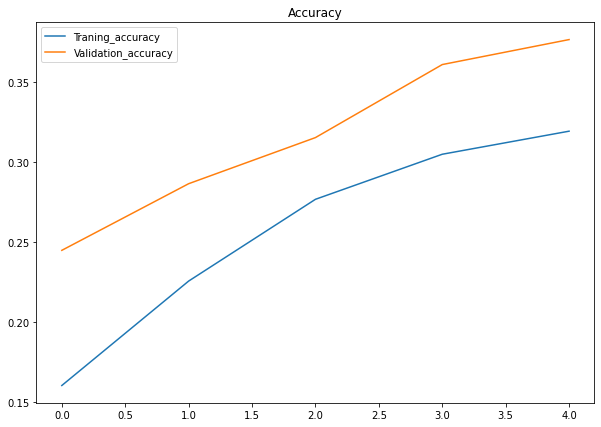

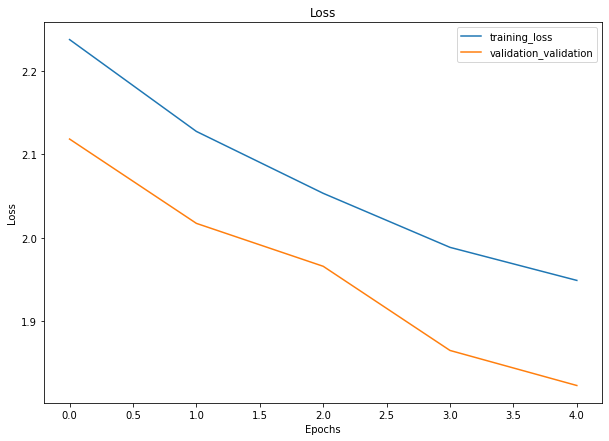

In [ ]:
plot_history(history_10)

#### **Which GPU are we using?**

In [ ]:
!nvidia-smi

Wed Jun  8 05:39:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    32W /  70W |   2332MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------